In [25]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.manifold import TSNE
from math import sqrt
from scipy.stats import probplot


from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv("data/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df = df.drop_duplicates()

In [7]:
for col in df.columns:

    num_distinct_values = len(df[col].unique())
    print(f"{col}: {num_distinct_values} unique values")

age: 47 unique values
sex: 2 unique values
bmi: 548 unique values
children: 6 unique values
smoker: 2 unique values
region: 4 unique values
charges: 1337 unique values


In [8]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

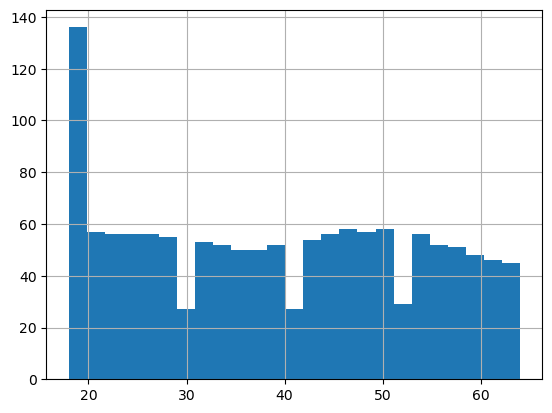

In [10]:
df.age.hist(bins=25)

<Axes: >

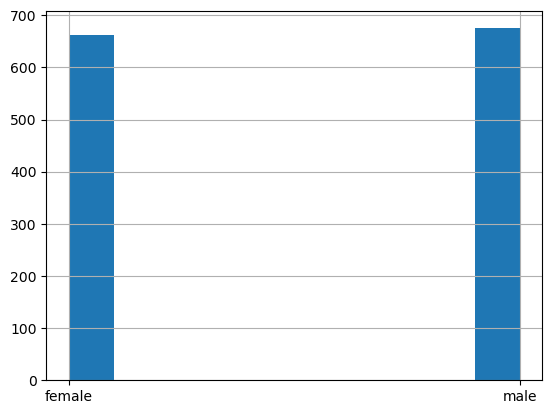

In [11]:
df.sex.hist()

<Axes: >

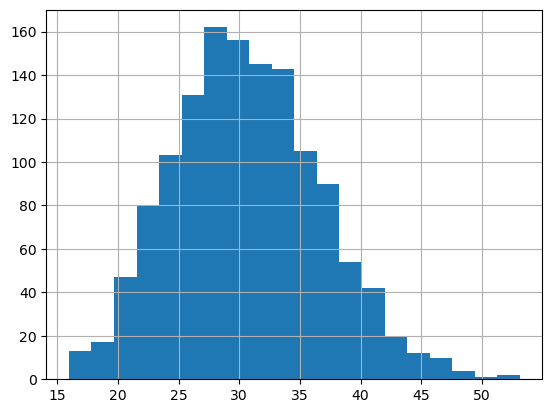

In [12]:
df.bmi.hist(bins=20)

<Axes: >

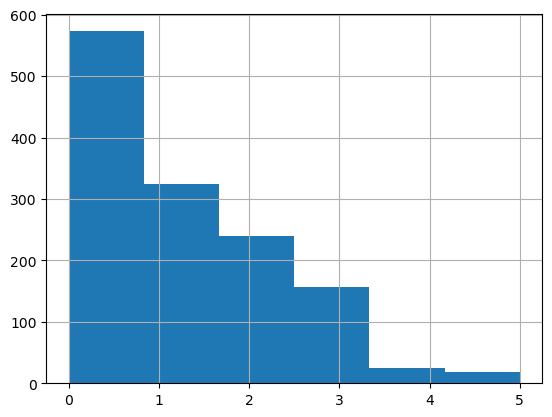

In [13]:
df.children.hist(bins = 6)

<Axes: >

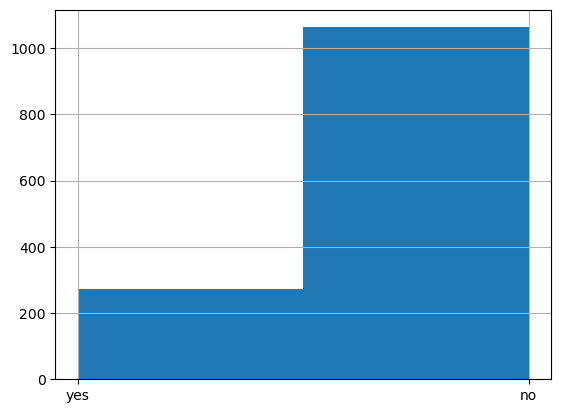

In [14]:
df.smoker.hist(bins = 2)

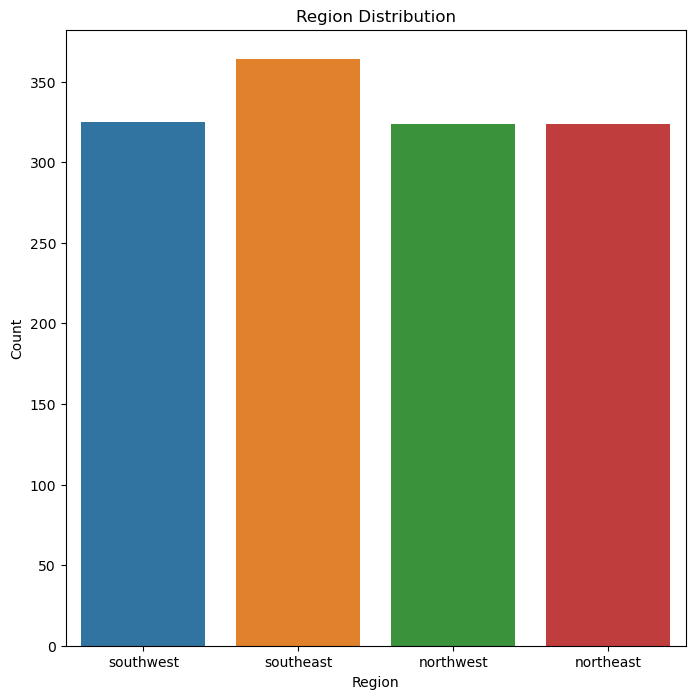

In [15]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()

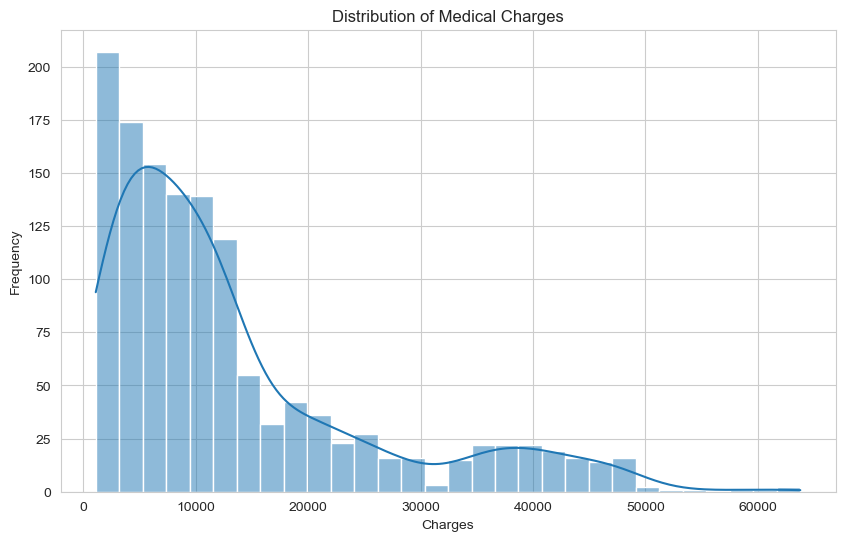

In [16]:
sns.set_style("whitegrid")

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

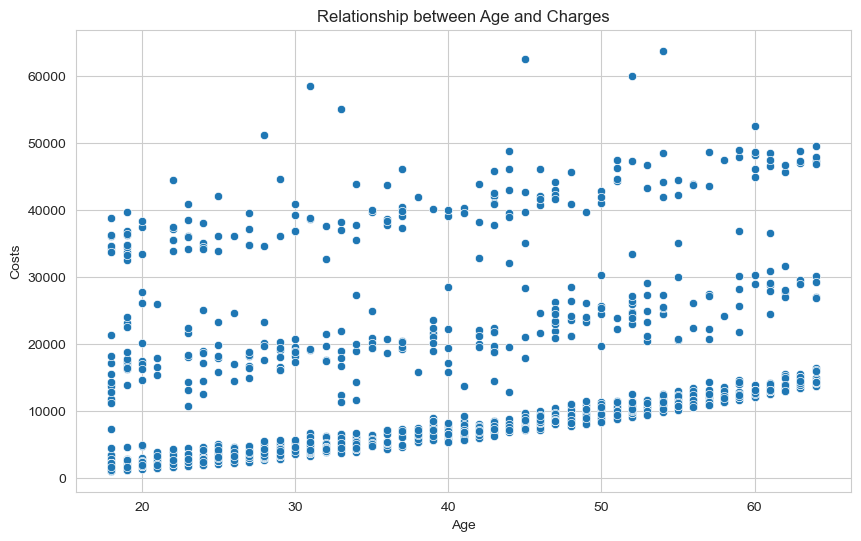

In [17]:
# sns.set_style("whitegrid")

# Plotting the relationship using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Relationship between Age and Charges')
plt.xlabel('Age')
plt.ylabel('Costs')
plt.show()

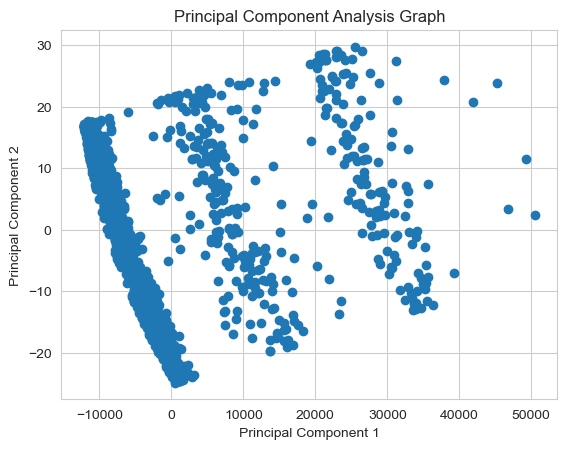

In [18]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['age', 'bmi', 'charges']])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis Graph')
plt.show()

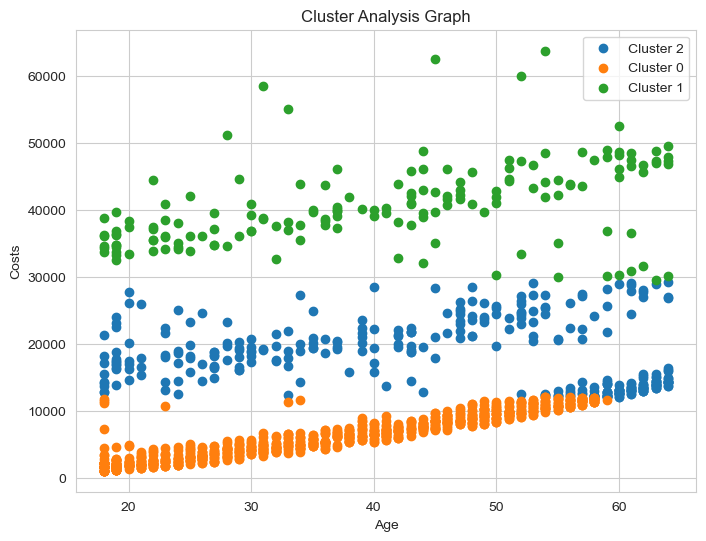

In [19]:
# features = ['age', 'bmi', 'charges']
# X = df[features]
# kmeans = KMeans(n_clusters=3)
# df['cluster'] = kmeans.fit_predict(X)
# plt.scatter(df['age'], df['charges'], c=df['cluster'])
# plt.xlabel('Age')
# plt.ylabel('Costs')
# plt.title('Cluster Analysis Graph')
# plt.show()

features = ['age', 'bmi', 'charges']
X = df[features]

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Scatter plot with legend
plt.figure(figsize=(8, 6))
for cluster_num in df['cluster'].unique():
    plt.scatter(
        df[df['cluster'] == cluster_num]['age'],
        df[df['cluster'] == cluster_num]['charges'],
        label=f'Cluster {cluster_num}',
    )

plt.xlabel('Age')
plt.ylabel('Costs')
plt.title('Cluster Analysis Graph')
plt.legend()
plt.show()
# This code uses a loop to create scatter plots for each cluster separately, allowing you to assign a label to each cluster in the legend. The plt.legend() function is used to display the legend in the plot. Please replace the sample data with your actual dataframe for your use case.







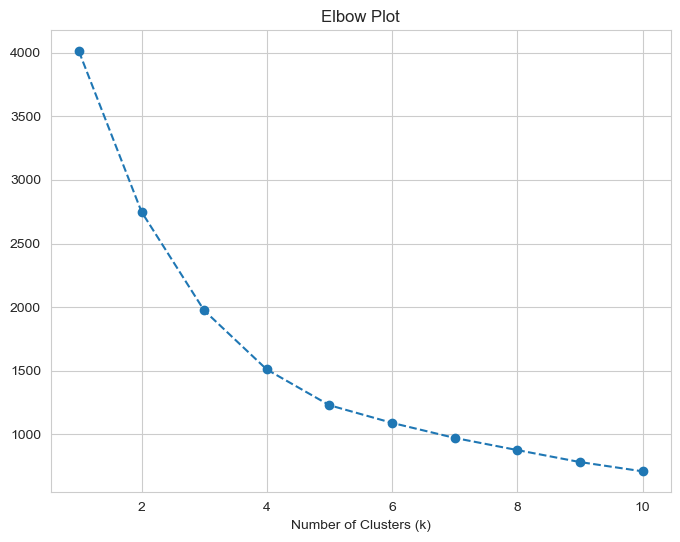

In [20]:

features = ['age', 'bmi', 'charges']
categorical_features = ['sex', 'smoker']


df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df_encoded[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')

plt.title('Elbow Plot')
plt.show()

               age        bmi       charges
cluster                                    
0        50.710769  26.439185  14280.886832
1        26.381148  34.895553   4412.420453
2        27.397661  25.203611   7451.115907
3        39.571429  35.339534  40601.759900
4        52.003774  36.152774  11136.232577


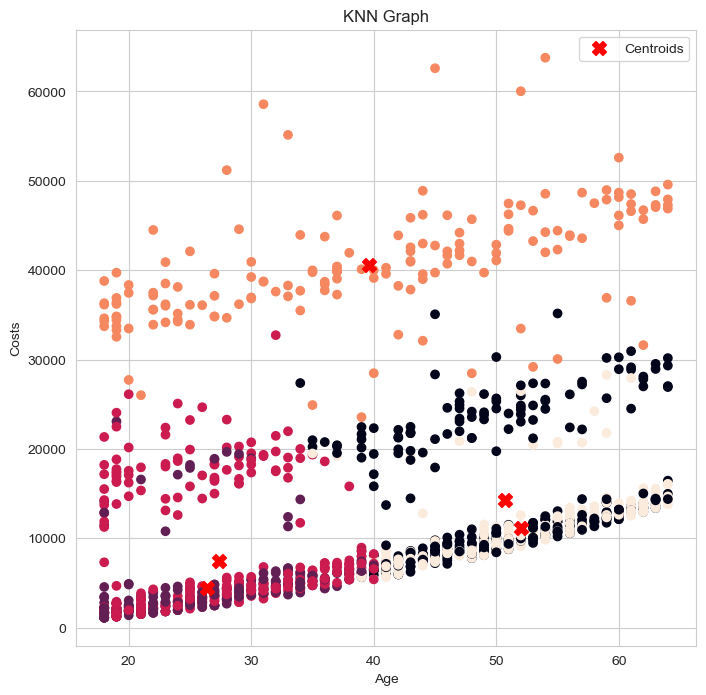

In [21]:
k = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the cluster labels to the dataset
df['cluster'] = labels

# Analyze the clusters
cluster_analysis = df.groupby('cluster')[features].mean()
print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(8, 8))
# plt.scatter(df['age'], df['charges'], c=df['cluster'], cmap='viridis')
plt.scatter(df['age'], df['charges'], c=df['cluster'])
plt.scatter(cluster_analysis['age'], cluster_analysis['charges'], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Costs')
plt.title('KNN Graph')
plt.legend()
plt.show()

# Analysis 

### cluster 0  
average age 50.710769  

average bmi 26.439185  

average medical costs 14280.8868

### cluster 1 
average age 26.381148  

average bmi 34.895553 

average medical costs 4412.4204

### cluster 2 
average age 27.397661

average bmi 25.203611 

average medical costs 7451.1159

### cluster 3
average age 39.571429

average bmi 35.339534

average medical costs 40601.759900

### cluster 4
average age 52.003774

average bmi 36.152774

average medical costs 11136.232577

In [22]:
#Select the features for t-SNE
numerical_features = ['age', 'bmi', 'charges']
categorical_features = ['sex', 'smoker', 'region']

# Encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded[numerical_features + list(df_encoded.columns[df_encoded.columns.str.startswith(tuple(categorical_features))])])

# Apply t-SNE
tsne = TSNE()
X_tsne = tsne.fit_transform(X)

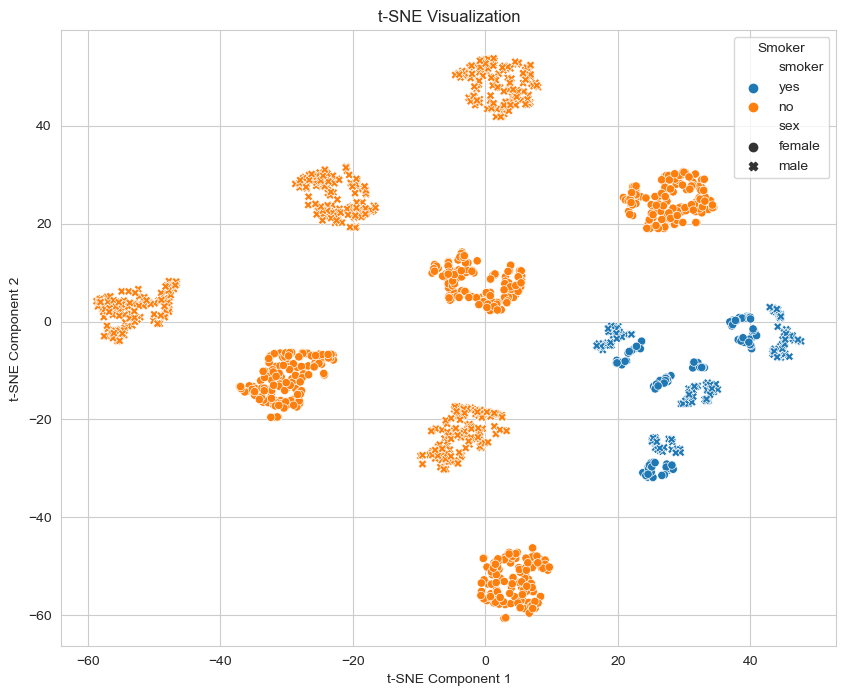

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['smoker'], style=df['sex'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.legend(title='Smoker', loc='upper right')
plt.show()

# Other Findings

In [31]:
data = pd.read_csv("data/insurance.csv")
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
numerical_columns = ['age', 'bmi', 'children', 'smoker', 'charges', 'sex']
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)
# # Drop the original numerical columns
# dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# # Concatenate the dummy variables and scaled numerical columns
# processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

In [33]:
scaled_numerical_df

,age,bmi,children,smoker,charges,sex
0,-1.438764,-0.453320,-0.908614,1.970587,0.298584,-1.010519
1,-1.509965,0.509621,-0.078767,-0.507463,-0.953689,0.989591
2,-0.797954,0.383307,1.580926,-0.507463,-0.728675,0.989591
3,-0.441948,-1.305531,-0.908614,-0.507463,0.719843,0.989591
4,-0.513149,-0.292556,-0.908614,-0.507463,-0.776802,0.989591
...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.507463,-0.220551,0.989591
1334,-1.509965,0.206139,-0.908614,-0.507463,-0.914002,-1.010519
1335,-1.509965,1.014878,-0.908614,-0.507463,-0.961596,-1.010519
1336,-1.296362,-0.797813,-0.908614,-0.507463,-0.930362,-1.010519


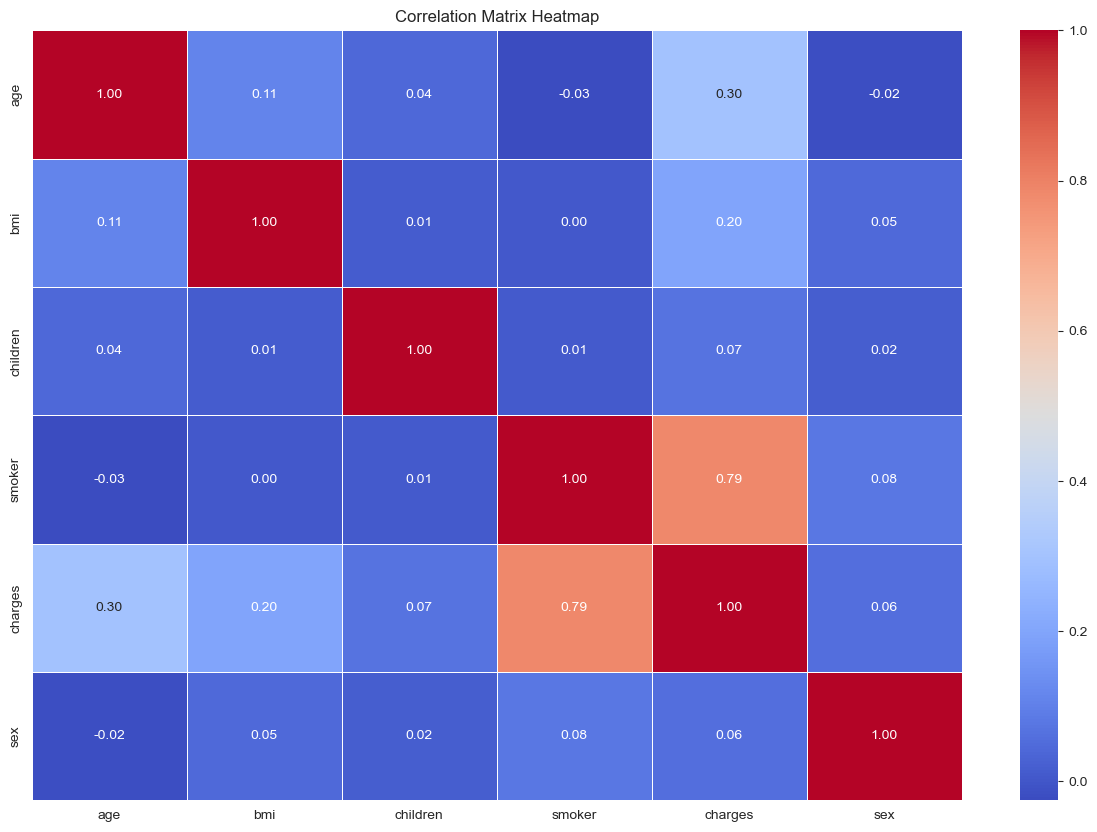

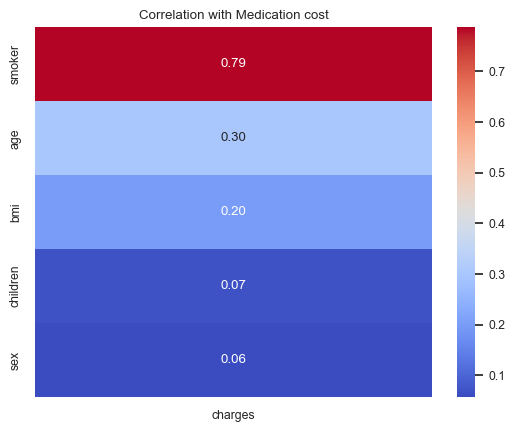

In [35]:
correlation_matrix = scaled_numerical_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = scaled_numerical_df.corr()
target_corr = corr['charges'].drop('charges')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Medication cost')
plt.show()

In [29]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500
